# Predicting heart disease

In this project given the data we are predicting whether the patient has heart
disease or not

## 1. Problem definition

> Given clinical report of a patient we have to predict whether the patient has 
heart disease or not

## 2. Data

Original data came from uci machine learning repository

This dataset is taken from kaggle: https://www.kaggle.com/datasets/sumaiyatasmeem/heart-disease-classification-dataset

## 3. Evaluation

> If we have accuracy of more than 95% then we can pursue on this project

## 4. Features

* age: Displays the age of the individual.

* sex: Displays the gender of the individual using the following format : 1 = male 0 = female

* Chest-pain type: displays the type of chest-pain experienced by the individual using the following format : 0 = typical angina 1 = atypical angina 2 = non — anginal pain 3 = asymptotic

* trestbps- Resting Blood Pressure: displays the resting blood pressure value of an individual in mmHg (unit). anything above 130-140 is typically cause for concern.

* chol- Serum Cholestrol: displays the serum cholesterol in mg/dl (unit)

* fbs- Fasting Blood Sugar: compares the fasting blood sugar value of an individual with 120mg/dl. If fasting blood sugar > 120mg/dl then : 1 (true) else : 0 (false) '>126' mg/dL signals diabetes

* restecg- Resting ECG : displays resting electrocardiographic results 0 = normal 1 = having ST-T wave abnormality 2 = left ventricular hyperthrophy

* Max heart rate achieved : displays the max heart rate achieved by an individual.
    
* exang- Exercise induced angina : 1 = yes 0 = no

* oldpeak- ST depression induced by exercise relative to rest: displays the value which is an integer or float.

* slope- Slope of the peak exercise ST segment : 0 = upsloping: better heart rate with excercise (uncommon) 1 = flat: minimal change (typical healthy heart) 2 = downsloping: signs of unhealthy heart

* ca- Number of major vessels (0–3) colored by flourosopy : displays the value as integer or float.

* thalassemia : 1,3 = normal 6 = fixed defect 7 = reversible defect: no proper blood movement when excercising

* target : Displays whether the individual is suffering from heart disease or not : 1 = yes 0 = no

In [1]:
# Importing all the tools we need

# Regular EDA(exploatary data analysis) and plotting libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# Models from scikit learn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Model Evaluations
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve

### Load data

In [75]:
df_org = pd.read_csv("Data\HeartDiseaseTrain-Test.csv")

In [76]:
df = df_org.copy()

## Exploratary Data Analysis(EDA) 
here we are trying to learn more about data and their relationships

1. What questions do we have about the data
2. How do we trear different kinds of data
3. Missing data and how do we deal with it
4. Is there any outliers and what to do with it


In [77]:
df.shape

(1025, 14)

In [78]:
df["target"].value_counts()

1    526
0    499
Name: target, dtype: int64

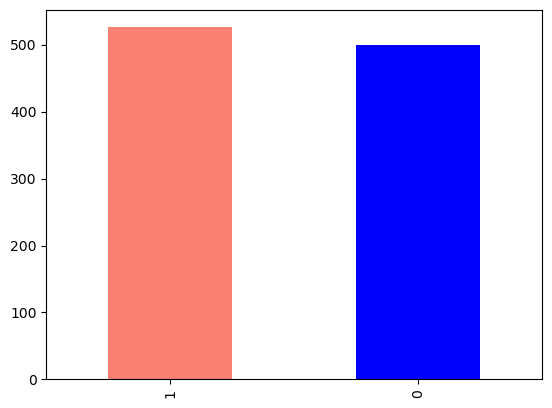

In [79]:
df["target"].value_counts().plot(kind = "bar",color = ["salmon", "blue"]);

In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   age                            1025 non-null   int64  
 1   sex                            1025 non-null   object 
 2   chest_pain_type                1025 non-null   object 
 3   resting_blood_pressure         1025 non-null   int64  
 4   cholestoral                    1025 non-null   int64  
 5   fasting_blood_sugar            1025 non-null   object 
 6   rest_ecg                       1025 non-null   object 
 7   Max_heart_rate                 1025 non-null   int64  
 8   exercise_induced_angina        1025 non-null   object 
 9   oldpeak                        1025 non-null   float64
 10  slope                          1025 non-null   object 
 11  vessels_colored_by_flourosopy  1025 non-null   object 
 12  thalassemia                    1025 non-null   o

In [81]:
df.isnull().sum()

age                              0
sex                              0
chest_pain_type                  0
resting_blood_pressure           0
cholestoral                      0
fasting_blood_sugar              0
rest_ecg                         0
Max_heart_rate                   0
exercise_induced_angina          0
oldpeak                          0
slope                            0
vessels_colored_by_flourosopy    0
thalassemia                      0
target                           0
dtype: int64

In [82]:
# We have no missing values
df.describe()

,age,resting_blood_pressure,cholestoral,Max_heart_rate,oldpeak,target
count,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000
mean,54.434146,131.611707,246.00000,149.114146,1.071512,0.513171
std,9.072290,17.516718,51.59251,23.005724,1.175053,0.500070
min,29.000000,94.000000,126.00000,71.000000,0.000000,0.000000
25%,48.000000,120.000000,211.00000,132.000000,0.000000,0.000000
50%,56.000000,130.000000,240.00000,152.000000,0.800000,1.000000
75%,61.000000,140.000000,275.00000,166.000000,1.800000,1.000000
max,77.000000,200.000000,564.00000,202.000000,6.200000,1.000000


In [83]:
def give_columntype(df):
    column_type = {"object" : [],
                  "Numeric" : []}
    for label,content in df.items():
        if not pd.api.types.is_numeric_dtype(content):
            column_type["object"].append(label)
        if pd.api.types.is_numeric_dtype(content):
            column_type["Numeric"].append(label)
    return column_type

In [84]:
column_type = give_columntype(df)
column_type

{'object': ['sex',
  'chest_pain_type',
  'fasting_blood_sugar',
  'rest_ecg',
  'exercise_induced_angina',
  'slope',
  'vessels_colored_by_flourosopy',
  'thalassemia'],
 'Numeric': ['age',
  'resting_blood_pressure',
  'cholestoral',
  'Max_heart_rate',
  'oldpeak',
  'target']}

In [85]:
list_1 = []

In [86]:
for column in column_type["object"]:
    list_1.append(df[column].value_counts())

In [87]:
for ele in list_1:
    print(ele)
    print(" ")

Male      713
Female    312
Name: sex, dtype: int64
 
Typical angina      497
Non-anginal pain    284
Atypical angina     167
Asymptomatic         77
Name: chest_pain_type, dtype: int64
 
Lower than 120 mg/ml      872
Greater than 120 mg/ml    153
Name: fasting_blood_sugar, dtype: int64
 
ST-T wave abnormality           513
Normal                          497
Left ventricular hypertrophy     15
Name: rest_ecg, dtype: int64
 
No     680
Yes    345
Name: exercise_induced_angina, dtype: int64
 
Flat           482
Downsloping    469
Upsloping       74
Name: slope, dtype: int64
 
Zero     578
One      226
Two      134
Three     69
Four      18
Name: vessels_colored_by_flourosopy, dtype: int64
 
Fixed Defect         544
Reversable Defect    410
Normal                64
No                     7
Name: thalassemia, dtype: int64
 


In [88]:
list_2 = []

In [89]:
for ele in df["sex"]:
    if ele == "Male":
        list_2.append(1)
    else:
        list_2.append(0)

In [90]:
df["sex"] = list_2

In [91]:
df["sex"].value_counts()

1    713
0    312
Name: sex, dtype: int64

In [92]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   age                            1025 non-null   int64  
 1   sex                            1025 non-null   int64  
 2   chest_pain_type                1025 non-null   object 
 3   resting_blood_pressure         1025 non-null   int64  
 4   cholestoral                    1025 non-null   int64  
 5   fasting_blood_sugar            1025 non-null   object 
 6   rest_ecg                       1025 non-null   object 
 7   Max_heart_rate                 1025 non-null   int64  
 8   exercise_induced_angina        1025 non-null   object 
 9   oldpeak                        1025 non-null   float64
 10  slope                          1025 non-null   object 
 11  vessels_colored_by_flourosopy  1025 non-null   object 
 12  thalassemia                    1025 non-null   o

In [93]:
list_2 = []

In [94]:
for ele in df["exercise_induced_angina"]:
    if ele == "Yes":
        list_2.append(1)
    else:
        list_2.append(0)

In [95]:
df["exercise_induced_angina"] = list_2

In [96]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   age                            1025 non-null   int64  
 1   sex                            1025 non-null   int64  
 2   chest_pain_type                1025 non-null   object 
 3   resting_blood_pressure         1025 non-null   int64  
 4   cholestoral                    1025 non-null   int64  
 5   fasting_blood_sugar            1025 non-null   object 
 6   rest_ecg                       1025 non-null   object 
 7   Max_heart_rate                 1025 non-null   int64  
 8   exercise_induced_angina        1025 non-null   int64  
 9   oldpeak                        1025 non-null   float64
 10  slope                          1025 non-null   object 
 11  vessels_colored_by_flourosopy  1025 non-null   object 
 12  thalassemia                    1025 non-null   o

In [97]:
list_2 = []
for ele in df["fasting_blood_sugar"]:
    if ele == "Greater than 120 mg/ml":
        list_2.append(1)
    else:
        list_2.append(0)
df["fasting_blood_sugar"] = list_2

In [98]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   age                            1025 non-null   int64  
 1   sex                            1025 non-null   int64  
 2   chest_pain_type                1025 non-null   object 
 3   resting_blood_pressure         1025 non-null   int64  
 4   cholestoral                    1025 non-null   int64  
 5   fasting_blood_sugar            1025 non-null   int64  
 6   rest_ecg                       1025 non-null   object 
 7   Max_heart_rate                 1025 non-null   int64  
 8   exercise_induced_angina        1025 non-null   int64  
 9   oldpeak                        1025 non-null   float64
 10  slope                          1025 non-null   object 
 11  vessels_colored_by_flourosopy  1025 non-null   object 
 12  thalassemia                    1025 non-null   o

In [99]:
pd.crosstab( df["sex"], df["target"])

target,0,1
sex,,
0,86,226
1,413,300


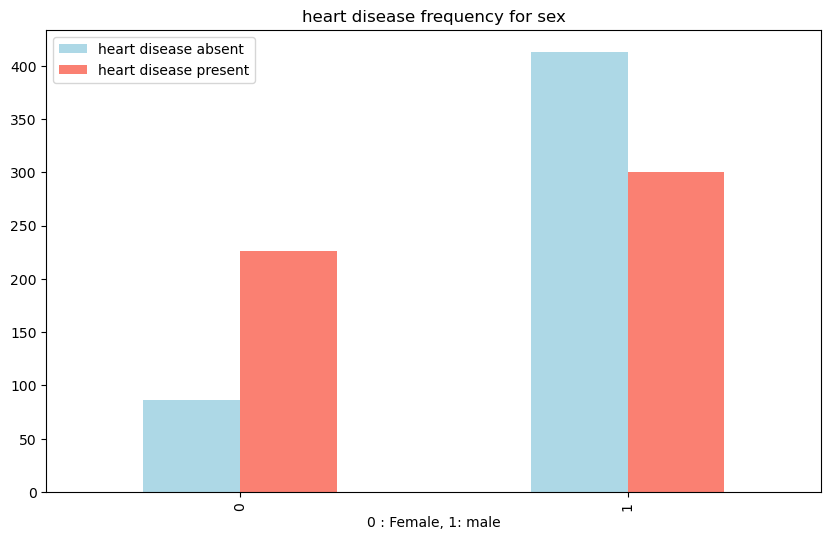

In [100]:
pd.crosstab( df["sex"], df["target"]).plot(kind = "bar", figsize = (10,6), color = ["lightblue", "salmon"]);
plt.title("heart disease frequency for sex");
plt.xlabel("0 : Female, 1: male");
plt.legend(["heart disease absent", "heart disease present"])

In [101]:
df["Max_heart_rate"].value_counts()

162    35
160    31
163    29
173    28
152    28
       ..
194     3
185     3
106     3
88      3
113     3
Name: Max_heart_rate, Length: 91, dtype: int64

In [102]:
column_type = give_columntype(df)
column_type

{'object': ['chest_pain_type',
  'rest_ecg',
  'slope',
  'vessels_colored_by_flourosopy',
  'thalassemia'],
 'Numeric': ['age',
  'sex',
  'resting_blood_pressure',
  'cholestoral',
  'fasting_blood_sugar',
  'Max_heart_rate',
  'exercise_induced_angina',
  'oldpeak',
  'target']}

In [103]:
for label, content in df.items():
    if label in column_type["object"]:
        df[label] = pd.Categorical(content).codes

In [107]:
df.to_csv("Data\df_numerical.csv",
         index = False)

In [109]:
df_tmp = pd.read_csv("Data\df_numerical.csv",
                    low_memory = False)

In [110]:
df_tmp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   age                            1025 non-null   int64  
 1   sex                            1025 non-null   int64  
 2   chest_pain_type                1025 non-null   int64  
 3   resting_blood_pressure         1025 non-null   int64  
 4   cholestoral                    1025 non-null   int64  
 5   fasting_blood_sugar            1025 non-null   int64  
 6   rest_ecg                       1025 non-null   int64  
 7   Max_heart_rate                 1025 non-null   int64  
 8   exercise_induced_angina        1025 non-null   int64  
 9   oldpeak                        1025 non-null   float64
 10  slope                          1025 non-null   int64  
 11  vessels_colored_by_flourosopy  1025 non-null   int64  
 12  thalassemia                    1025 non-null   i

### Age vs Max Heart rate

Text(0.5, 0, 'Age')

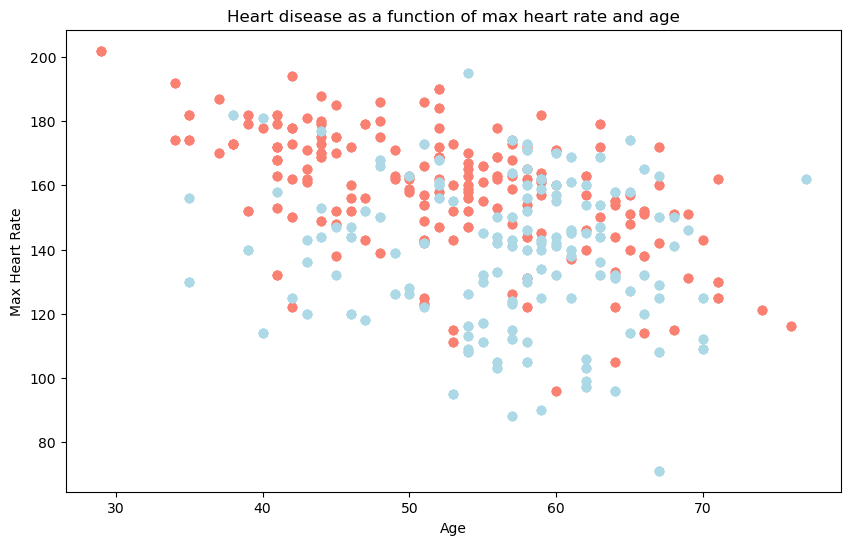

In [118]:
# Plotting age vs max heart rate
fig, ax = plt.subplots(figsize = (10,6))

# Scatter plot with heart disease
ax.scatter(df["age"][df["target"] == 1],
          df["Max_heart_rate"][df["target"] == 1],
          c = "salmon");

# Scatter plot with no heart disease
ax.scatter(df["age"][df["target"] == 0],
          df["Max_heart_rate"][df["target"] == 0],
          c = "lightblue");

ax.set_title("Heart disease as a function of max heart rate and age");
ax.set_ylabel("Max Heart Rate")
ax.set_xlabel("Age")

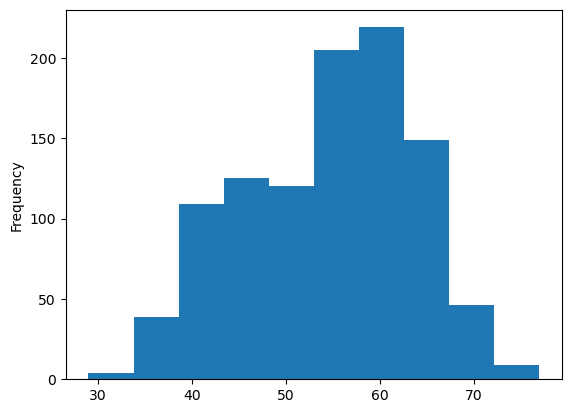

In [121]:
# Checking distribution of the age
df["age"].plot.hist();

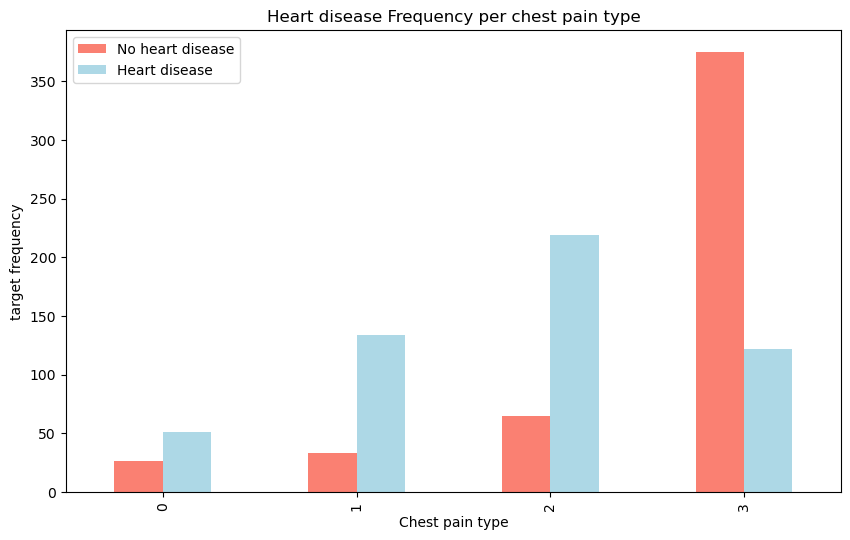

In [125]:
pd.crosstab(df["chest_pain_type"], df["target"]).plot(kind = "bar",
                                                     figsize = (10,6),
                                                     color = ["salmon", "lightblue"]);
plt.title("Heart disease Frequency per chest pain type");
plt.xlabel("Chest pain type");
plt.ylabel("target frequency");
plt.legend(["No heart disease", "Heart disease"]);

# 5. Modelling

In [2]:
df_tmp = pd.read_csv("Data\df_numerical.csv",
                    low_memory = False)

In [3]:
# Splitting data into data and label
X = df_tmp.drop("target", axis = 1)

y = df_tmp["target"]

In [4]:
X.shape, y.shape

((1025, 13), (1025,))

In [5]:
# Split data into train and test set
np.random.seed(42)
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y, 
                                                    test_size = 0.2) 

In [6]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((820, 13), (205, 13), (820,), (205,))

We are going to try three different models
1. Logistic regression
2. K-Nearest neighbor classifier
3. Random Forest Classifier

In [25]:
models = {
    "Logistic regression" : LogisticRegression(),
    "KNN" : KNeighborsClassifier(),
    "Random Forest" : RandomForestClassifier()
}

# Create a function to fit and score models
def fit_and_score(models, X_train, X_test, y_train, y_test):
    np.random.seed(42)
    model_score = {}
    for name,model in models.items():
        model.fit(X_train,y_train)
        model_score[name] = model.score(X_test, y_test)
        if name == "Random Forest":
            model.get_params()
    return model_score
        

In [26]:
model_score = fit_and_score(models, X_train, X_test, y_train, y_test)

C:\sample_project\env\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [27]:
model_compare = pd.DataFrame(model_score, index = ["analysis"])

In [29]:
model1 = RandomForestClassifier()
model1.fit(X_train, y_train)
model1.score(X_test, y_test)
model1.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

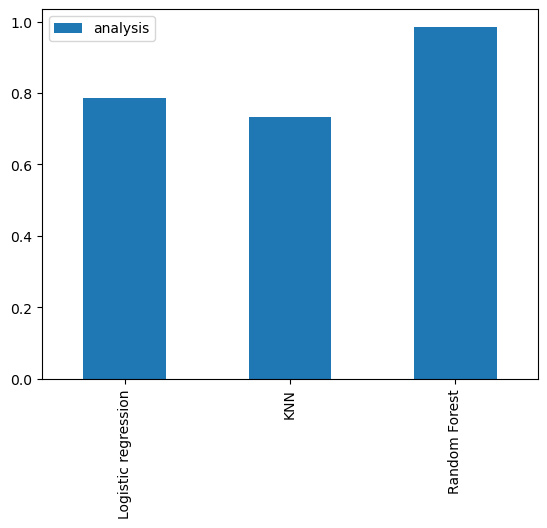

In [19]:
model_compare.T.plot.bar();

In [20]:
model_compare

,Logistic regression,KNN,Random Forest
analysis,0.785366,0.731707,0.985366


In [5]:
np.logspace(-3,3,10)

array([1.00000000e-03, 4.64158883e-03, 2.15443469e-02, 1.00000000e-01,
       4.64158883e-01, 2.15443469e+00, 1.00000000e+01, 4.64158883e+01,
       2.15443469e+02, 1.00000000e+03])

## Hyperparamter tuning with randomizedsearchcv

In [7]:
# Create a hyperparameter dictionary for logistic regression
log_reg_grid = {"C" : np.logspace(-4,4,20),
                "solver" : ["liblinear"]}

# Create a hyperparameter grid for RandomForestClassifier
rf_grid = {"n_estimators" : np.arange(10, 1000,50),
          "max_depth" : [None, 3, 5, 10],
          "min_samples_split" : np.arange(2,20,2),
          "min_samples_leaf" : np.arange(1, 20,2)}

In [8]:
# Tune Logistic regression
np.random.seed(42)

rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                               param_distributions = log_reg_grid,
                               cv = 5,
                               n_iter = 20,
                               verbose = True)

rs_log_reg.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [9]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 0.615848211066026}

In [10]:
rs_log_reg.score(X_test, y_test)

0.7853658536585366

In [11]:
# Tune Random Forest classifier
np.random.seed(42)

rs_rf = RandomizedSearchCV(RandomForestClassifier(),
                          param_distributions = rf_grid,
                          cv = 5,
                          n_iter = 20,
                          verbose = True)

rs_rf.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [12]:
rs_rf.best_params_

{'n_estimators': 510,
 'min_samples_split': 14,
 'min_samples_leaf': 1,
 'max_depth': None}

In [13]:
rs_rf.score(X_test, y_test)

0.926829268292683

In [14]:
y_preds = rs_rf.predict(X_test)

In [15]:
# plot ROC curve and calculate AUC Metric
fpr, tpr, threshold = roc_curve(y_preds, y_test)

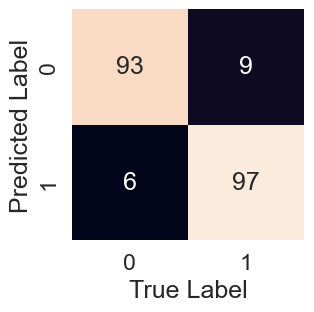

In [16]:
sns.set(font_scale = 1.5)
def plot_conf_matr(y_preds, y_test):
    fig, ax = plt.subplots(figsize = (3,3))
    ax = sns.heatmap(confusion_matrix(y_test, y_preds),
                    annot = True,
                    cbar = False)
    plt.xlabel("True Label")
    plt.ylabel("Predicted Label")

plot_conf_matr(y_preds, y_test)

In [17]:
print(classification_report(y_preds, y_test))

              precision    recall  f1-score   support

           0       0.91      0.94      0.93        99
           1       0.94      0.92      0.93       106

    accuracy                           0.93       205
   macro avg       0.93      0.93      0.93       205
weighted avg       0.93      0.93      0.93       205



In [48]:
clf = LogisticRegression(C = 0.204335,
                        solver = "liblinear")

In [28]:
def cv_scores(clf, X, y):
    cv_dict = {}
    scores = ["accuracy", "precision", "recall", "f1"]
    for score in scores:
        result = cross_val_score(clf,
               X,
               y,
               cv = 5,
               scoring = score)
        cv_dict[score] = np.mean(result)
    return cv_dict

In [37]:
cv_dict = cv_scores(clf, X, y)

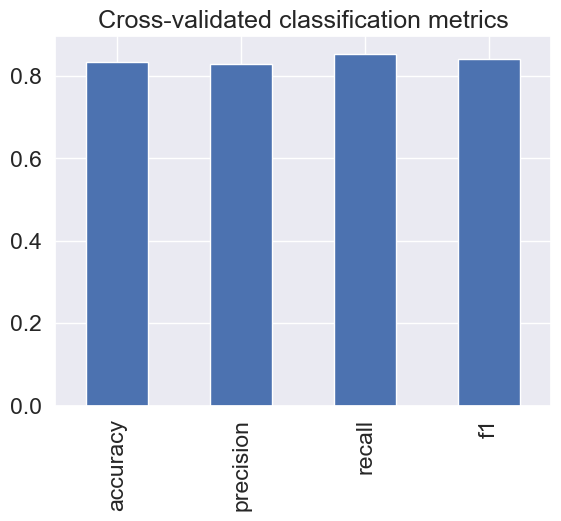

In [43]:
pd.DataFrame(cv_dict, index = [0]).T.plot.bar(title = "Cross-validated classification metrics",
                                             legend = False);

## Feature Importance

which features affect the target more

In [45]:
df_tmp.head()

,age,sex,chest_pain_type,resting_blood_pressure,cholestoral,fasting_blood_sugar,rest_ecg,Max_heart_rate,exercise_induced_angina,oldpeak,slope,vessels_colored_by_flourosopy,thalassemia,target
0,52,1,3,125,212,0,2,168,0,1.0,0,3,3,0
1,53,1,3,140,203,1,1,155,1,3.1,2,4,3,0
2,70,1,3,145,174,0,2,125,1,2.6,2,4,3,0
3,61,1,3,148,203,0,2,161,0,0.0,0,1,3,0
4,62,0,3,138,294,1,2,106,0,1.9,1,2,0,0


In [57]:
clf.fit(X_train, y_train)
coeff = clf.coef_

In [54]:
X_train.head()

,age,sex,chest_pain_type,resting_blood_pressure,cholestoral,fasting_blood_sugar,rest_ecg,Max_heart_rate,exercise_induced_angina,oldpeak,slope,vessels_colored_by_flourosopy,thalassemia
835,49,1,2,118,149,0,1,126,0,0.8,0,2,0
137,64,0,3,180,325,0,2,154,1,0.0,0,4,0
534,54,0,2,108,267,0,1,167,0,0.0,0,4,0
495,59,1,3,135,234,0,2,161,0,0.5,1,4,3
244,51,1,2,125,245,1,1,166,0,2.4,1,4,0


In [55]:
X_train.shape

(820, 13)

In [59]:
coeff

array([[ 0.0120579 , -0.84865131, -0.64076946, -0.01140689, -0.0075915 ,
         0.05952557,  0.34112276,  0.02691288, -0.59412463, -0.62832784,
        -0.21732095,  0.53648467, -0.53651493]])

In [60]:
coeff.shape

(1, 13)

In [61]:
feature_dict = dict(zip(X_train.columns , coeff[0]))

In [62]:
feature_dict

{'age': 0.012057902394986565,
 'sex': -0.8486513089797447,
 'chest_pain_type': -0.6407694618686808,
 'resting_blood_pressure': -0.011406892717140871,
 'cholestoral': -0.007591502091255966,
 'fasting_blood_sugar': 0.05952557019358572,
 'rest_ecg': 0.34112275552798815,
 'Max_heart_rate': 0.02691287872673031,
 'exercise_induced_angina': -0.5941246263812009,
 'oldpeak': -0.6283278383568461,
 'slope': -0.21732094934528873,
 'vessels_colored_by_flourosopy': 0.5364846708346208,
 'thalassemia': -0.5365149278939102}

In [63]:
feature_df = pd.DataFrame(feature_dict, index = [0])

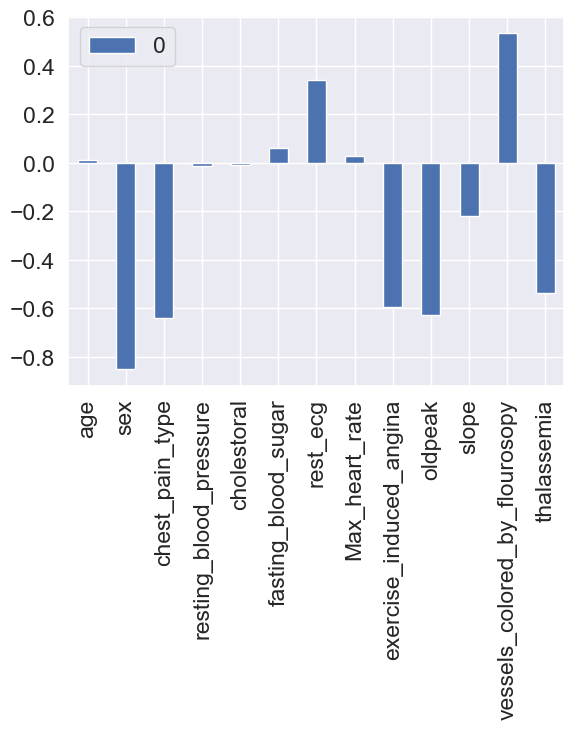

In [65]:
feature_df.T.plot.bar();